#### MAESTRÍA EN ECONOMÍA APLICADA - UBA 2025
#### TALLER DE PROGRAMACIÓN
#### GRUPO 2 - TP1

In [1]:
# Librerías a utilizar
# !pip install openpyxl - utilizar en caso no te cargue el archivo de excel
import pandas as pd
import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt

In [3]:
# Carga de datos de individuos de la EPH 1T2005-1T2025
#T105_original = pd.read_stata("C:\\Users\\user\\Documents\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\usu_individual_T105.dta",convert_categoricals=False)
#T125_original = pd.read_excel("C:\\Users\\user\\Documents\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\usu_individual_T125.xlsx")
T105_original = pd.read_stata("C:\\Users\\Usuario\\Documents\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\usu_individual_T105.dta",convert_categoricals=False)
T125_original = pd.read_excel("C:\\Users\\Usuario\\Documents\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\usu_individual_T125.xlsx")

In [4]:
# Carga de datos de hogares de la EPH 1T2005-1T2025 (para parte 1.d, que es opcional)
# H105_original = pd.read_stata("C:\\Users\\user\\Documents\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\Hogar_T105.dta",convert_categoricals=False)
# H125_original = pd.read_excel("C:\\Users\\user\\Documents\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\usu_hogar_T125.xlsx")
H105_original = pd.read_stata("C:\\Users\\Usuario\\Documents\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\Hogar_T105.dta",convert_categoricals=False)
H125_original = pd.read_excel("C:\\Users\\Usuario\\Documents\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\usu_hogar_T125.xlsx")

#### PARTE 1 - 2.a: Selección de región y fusión de bases

In [5]:
# Seleccion de variables de interes
select_var_T105 = ["CODUSU", "nro_hogar", "ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado", "cat_inac", "ipcf",
                   "cat_ocup", "pp03c", "pp03i", "pp10a", "p21", "tot_p12", "t_vi","itf"]
select_var_T125 = ["CODUSU", "NRO_HOGAR", "CH04", "CH06", "CH07", "CH08", "NIVEL_ED", "ESTADO", "CAT_INAC", "IPCF",
                   "CAT_OCUP", "PP03C", "PP03I", "PP10A", "P21", "TOT_P12", "T_VI","ITF"]

# Actualizamos nuestro dataframe con las variables seleccionadas y la región seleccionada Noroeste = NOA = 40
T105 = T105_original[T105_original['region'] == 40][select_var_T105]
T125 = T125_original[T125_original['REGION'] == 40][select_var_T125]

# Homogeneizamos los nombres de las columnas para poder fusionarlas más adelante
column_mapping = dict(zip(select_var_T125, select_var_T105)) # diccionario
T125 = T125.rename(columns=column_mapping) # renombramos

In [6]:
# Antes de proceder con la unión de ambas bases, verificamos que ambas tengan el mismo tipo de dato.
T105.info()
T125.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9348 entries, 9484 to 18831
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CODUSU     9348 non-null   object 
 1   nro_hogar  9348 non-null   float64
 2   ch04       9348 non-null   float64
 3   ch06       9348 non-null   float64
 4   ch07       9348 non-null   float64
 5   ch08       9348 non-null   float64
 6   nivel_ed   9348 non-null   float64
 7   estado     9348 non-null   float64
 8   cat_inac   9348 non-null   float64
 9   ipcf       9348 non-null   float64
 10  cat_ocup   9348 non-null   float64
 11  pp03c      9348 non-null   float64
 12  pp03i      9348 non-null   float64
 13  pp10a      9348 non-null   float64
 14  p21        9348 non-null   float64
 15  tot_p12    9348 non-null   float64
 16  t_vi       9348 non-null   float64
 17  itf        9348 non-null   float64
dtypes: float64(17), object(1)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
Ind

#### PARTE 1 - 2.b: Revisión de formato

In [7]:
# Ajustamos el Dtype para ambas bases
categóricas = ["ch04","ch06","ch07","ch08","nivel_ed","estado","cat_inac", "cat_ocup", "pp03c","pp03i","pp10a"]
T105[categóricas] = T105[categóricas].astype('int64')
T125["ch08"] = T125["ch08"].astype('int64')

# Creamos columna para identificar los df
T105['df'] = 'T105'
T125['df'] = 'T125'

# Fusionamos los archivos
eph_105_125 = pd.concat([T105, T125], ignore_index=True)
eph_105_125.sample(6)

,CODUSU,nro_hogar,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,cat_ocup,pp03c,pp03i,pp10a,p21,tot_p12,t_vi,itf,df
4562,171215,1.0,1,12,5,4,1,3,3,15.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,T105
8284,216421,1.0,2,26,2,2,1,3,4,166.666667,0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,T105
6649,265261,1.0,2,33,1,4,1,3,4,120.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,600.0,T105
4669,178503,2.0,2,32,2,1,5,3,4,312.500000,0,0.0,0.0,0.0,0.0,0.0,0.0,1250.0,T105
11494,TQRMNOPSVHKMKNCDEHJGH00859750,1.0,2,67,2,1,3,3,1,298333.330000,0,NaN,NaN,NaN,0.0,0.0,322000.0,895000.0,T125
10411,TQRMNOTPSHMMLMCDEHPJB00878266,1.0,1,33,2,4,5,1,0,183333.330000,2,1.0,1.0,NaN,400000.0,0.0,0.0,550000.0,T125


In [8]:
# Procedemos a revisar las variables que tenemos, exceptuando las variables de identificación
eph_105_125.drop("nro_hogar", axis=1).describe()

,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,cat_ocup,pp03c,pp03i,pp10a,p21,tot_p12,t_vi,itf
count,19090.000000,19090.000000,19090.000000,19090.000000,19090.000000,19090.000000,19090.000000,1.909000e+04,19090.000000,13701.000000,13701.000000,9571.000000,1.909000e+04,1.909000e+04,1.909000e+04,1.909000e+04
mean,1.518491,32.657098,3.728392,2.731011,3.632635,2.301100,1.895862,1.878937e+05,1.190257,0.565871,1.029487,0.207606,1.183426e+05,9.127822e+03,5.466182e+04,6.709034e+05
std,0.499671,21.544972,1.583989,2.411227,1.858963,1.157584,1.996001,3.135108e+05,1.404829,0.589433,0.958865,0.853200,3.122836e+05,7.646590e+04,1.905967e+05,9.991485e+05
min,1.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00
25%,1.000000,15.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.453125e+02,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02
50%,2.000000,29.000000,5.000000,2.000000,4.000000,3.000000,1.000000,6.362500e+02,0.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.487000e+03
75%,2.000000,48.000000,5.000000,4.000000,5.000000,3.000000,3.000000,3.000000e+05,3.000000,1.000000,2.000000,0.000000,6.000000e+02,0.000000e+00,0.000000e+00,1.130000e+06
max,2.000000,103.000000,5.000000,23.000000,7.000000,4.000000,7.000000,6.150000e+06,4.000000,2.000000,9.000000,5.000000,7.000000e+06,2.700000e+06,4.500000e+06,1.230000e+07


En base a esta tabla y al diseño del cuestionario de la EPH y detectamos que:

* CH06 (edad): existencia de valores negativos, que representa menores de un año
* CH08 (cobertura médica): 9 implica no respuesta
* CAT_INAC (categoria de inactividad): presenta 0, lo que es una señal de que no aplica esta pregunta para esa persona
* CAT_OCUP (categoria de actividad): presenta 0, lo que es una señal de que no aplica esta pregunta para esa persona
* ESTADO (condición de actividad): presenta 0, que implica no respuesta
* PP03C (empleo semana anterior): presenta 0, lo que es una señal de que no aplica esta pregunta para esa persona
* PP03I (buscó trabajo en el último mes): presenta 0, lo que es una señal de que no aplica esta pregunta para esa persona, y también 9, que es no responde
* PP10A (cuanto hace que busca empleo): presenta 0, lo que es una señal de que no aplica esta pregunta para esa persona, y también 9, que es no responde
* P21, TOT_P12 y T_VI, que son ingresos: presentan -9, indicativo de no respuesta

#### PARTE 1 - 2.c: Corrección de datos y heatmap

In [9]:
# Correcciones de datos
eph_105_125['ch06'] = eph_105_125['ch06'].replace(-1, 0) # Menores de 1 año
eph_105_125['ch08'] = eph_105_125['ch08'].replace(9, np.nan) # No sabe/No responde en cobertura médica
eph_105_125['estado'] = eph_105_125['estado'].replace(0, np.nan) # No responde estado de actividad
eph_105_125['p21'] = eph_105_125['p21'].replace(-9, np.nan) # No respuesta en ingreso ocupación principal
eph_105_125['tot_p12'] = eph_105_125['tot_p12'].replace(-9, np.nan) # No respuesta en ingreso otras ocupaciones
eph_105_125['t_vi'] = eph_105_125['t_vi'].replace(-9, np.nan) # No respuesta en total ingreso no laboral

# Se opta por no modificar los datos que implican no aplica, dado que representa una diferencia cualitativa y no un faltante de datos

In [10]:
# Revisamos los valores faltantes
eph_105_125.isna().sum()

CODUSU          0
nro_hogar       0
ch04            0
ch06            0
ch07            0
ch08           15
nivel_ed        0
estado         24
cat_inac        0
ipcf            0
cat_ocup        0
pp03c        5389
pp03i        5389
pp10a        9519
p21           246
tot_p12        44
t_vi          108
itf             0
df              0
dtype: int64

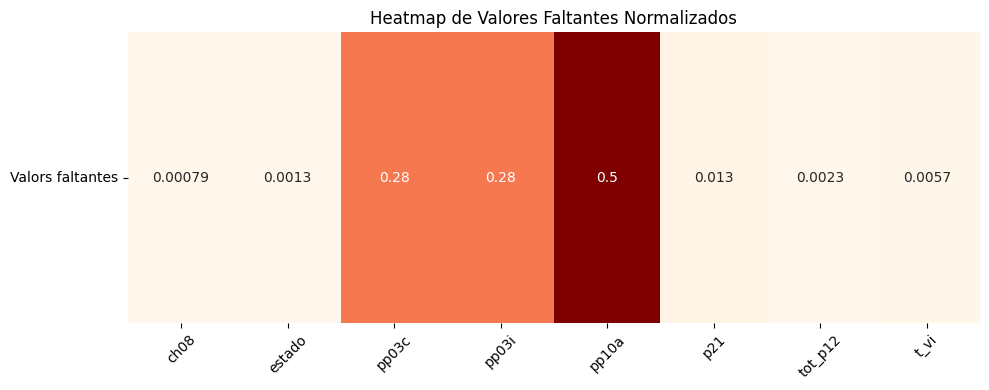

In [13]:
# Generamos el recuento de valores vacios
missing_counts = eph_105_125.isna().sum()
missing_counts = missing_counts[missing_counts > 0]

# Normalizar los valores faltantes para mejorar la visibilidad
normalized_missing = missing_counts / eph_105_125.shape[0]  # Normalizamos por el total de filas
missing_df = pd.DataFrame(normalized_missing, columns=['Valors faltantes'])

# Crear el heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(missing_df.transpose(), annot=True, cmap='OrRd', cbar=False)
plt.title('Heatmap de Valores Faltantes Normalizados')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### PARTE 1 - 2.d: Unión de base Hogares e Individuos 

In [14]:
# Seleccion de variables de interes
sel_HOG_T105 = ["CODUSU", "nro_hogar", "iv1", "iv2", "iv6", "iv8", "ii8"]
sel_HOG_T125 = ["CODUSU", "NRO_HOGAR", "IV1", "IV2", "IV6", "IV8", "II8"]

# Actualizamos nuestro dataframe con las variables seleccionadas y la región seleccionada Noroeste = NOA = 40
HOG_T105 = H105_original[H105_original['region'] == 40][sel_HOG_T105]
HOG_T125 = H125_original[H125_original['REGION'] == 40][sel_HOG_T125]

# Homogeneizamos los nombres de las columnas para poder fusionarlas más adelante
column_mapping_hog = dict(zip(sel_HOG_T125, sel_HOG_T105)) # diccionario
HOG_T125 = HOG_T125.rename(columns=column_mapping_hog) # renombramos

# Fusionamos los archivos
HOG_105_125 = pd.concat([HOG_T105, HOG_T125], ignore_index=True)
HOG_105_125.sample(6)

,CODUSU,nro_hogar,iv1,iv2,iv6,iv8,ii8
92,160063,1.0,1.0,3.0,1.0,1.0,1.0
4579,TQRMNOPWVHLMLQCDEGPDJ00853582,1.0,1.0,2.0,1.0,1.0,2.0
2355,TQRMNOQUTHJMKOCDEHIBB00874019,1.0,1.0,2.0,1.0,1.0,2.0
2408,TQRMNORQVHKOLPCDEHLEH00865138,1.0,1.0,5.0,1.0,1.0,1.0
928,255888,1.0,1.0,4.0,1.0,1.0,2.0
3350,TQRMNOPQTHLMLOCDEHLEH00854011,1.0,1.0,4.0,1.0,1.0,1.0


In [15]:
# INNER JOIN
inner = eph_105_125.merge(HOG_105_125, on=['CODUSU', 'nro_hogar'], how='inner')
print(f"Inner Join estructura: {inner.shape}, número de NAN: {inner.isna().sum().sum()}")

# LEFT JOIN
left = eph_105_125.merge(HOG_105_125, on=['CODUSU', 'nro_hogar'], how='left')
print(f"Left Join estructura: {left.shape}, número de NAN: {left.isna().sum().sum()}")

# RIGHT JOIN
right = eph_105_125.merge(HOG_105_125, on=['CODUSU', 'nro_hogar'], how='right')
print(f"Right Join estructura: {right.shape}, número de NAN: {right.isna().sum().sum()}")

# OUTER JOIN
outer = eph_105_125.merge(HOG_105_125, on=['CODUSU', 'nro_hogar'], how='outer')
print(f"Outer Join estructura: {outer.shape}, número de NAN: {outer.isna().sum().sum()}")

Inner Join estructura: (19090, 24), número de NAN: 20734
Left Join estructura: (19090, 24), número de NAN: 20734
Right Join estructura: (19090, 24), número de NAN: 20734
Outer Join estructura: (19090, 24), número de NAN: 20734


Son todos iguales básicamente por el hecho de que se deben corresponder uno a uno. Es decir, para cada persona hay un hogar asociado y viceversa, por lo tanto cada intento de unión arroja el mismo resultado.

#### PARTE 2 - 3: Gráfico de barras por sexo

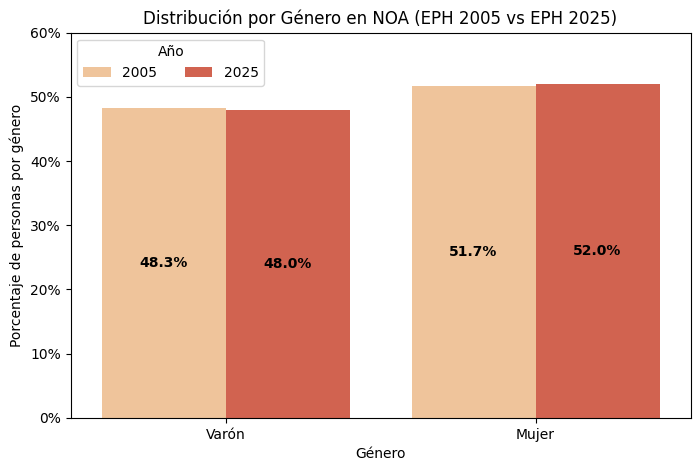

In [16]:
# Calculamos el porcentaje de varones y mujeres por año
porcentaje_genero = eph_105_125.groupby(['df', 'ch04']).size().reset_index(name='cantidad')
porcentaje_genero['porcentaje'] = porcentaje_genero.groupby('df')['cantidad'].transform(lambda x: x / x.sum())
porcentaje_genero["df"] = porcentaje_genero["df"].replace({"T105": "2005", "T125": "2025"})

# Visualizamos los resultados
plt.figure(figsize=(8, 5))
sns.barplot(data=porcentaje_genero, x='ch04', y='porcentaje', hue='df', palette='OrRd')
plt.xticks([0, 1], ['Varón', 'Mujer'])
plt.yticks(np.arange(0, 0.66, 0.1), labels=[f'{int(x*100)}%' for x in np.arange(0, 0.66, 0.1)])
plt.legend(title="Año", loc="upper left", ncol=2)
plt.xlabel('Género')
plt.ylabel('Porcentaje de personas por género')
plt.title('Distribución por Género en NOA (EPH 2005 vs EPH 2025)')

# Agregar etiquetas de porcentaje en cada barra
for i, bar in enumerate(plt.gca().patches):
    height = bar.get_height()
    if height == 0:
        pass
    else:
        # Agregar etiquetas de porcentaje en cada barra, centradas y en negrita, eliminando la última etiqueta extra
        plt.gca().text(
            bar.get_x() + bar.get_width() / 2,
            height / 2,
            f'{height:.1%}',
            ha='center',
            va='center',
            fontsize=10,
            fontweight='bold'
            )

plt.show()

#### PARTE 2 - 4: Matriz de correlaciones

In [32]:
# Seleccion de variables de interes
corr = pd.DataFrame()

#eph_105_125[['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']]

# Binarias:
corr["Varon"] = eph_105_125['ch04'].apply(lambda x: 1 if x == 1 else 0)
corr["Mujer"] = eph_105_125['ch04'].apply(lambda x: 1 if x == 2 else 0)

corr["ESTADO_Unido"] = eph_105_125['ch07'].apply(lambda x: 1 if x == 1 else 0) # Unido
corr["ESTADO_Casado"] = eph_105_125['ch07'].apply(lambda x: 1 if x == 2 else 0) # Casado
corr["ESTADO_Divorciado"] = eph_105_125['ch07'].apply(lambda x: 1 if x == 3 else 0) # Divorciado
corr["ESTADO_Viudo"] = eph_105_125['ch07'].apply(lambda x: 1 if x == 4 else 0) # Viudo
corr["ESTADO_Soltero"] = eph_105_125['ch07'].apply(lambda x: 1 if x == 5 else 0) # Soltero

# Agrupamos para la cobertura médica, para simplificar el análisis
corr["Obra social"] = eph_105_125['ch08'].apply(lambda x: 1 if x in [1, 12, 13, 123] else 0) # Obra social
corr["Prepaga"] = eph_105_125['ch08'].apply(lambda x: 1 if x in [2, 12, 23, 123] else 0) # Mutual/prepaga/servicio de emergencia
corr["Planes publicos"] = eph_105_125['ch08'].apply(lambda x: 1 if x in [3, 13, 23, 123] else 0) # Planes y seguros públicos
corr["No tiene"] = eph_105_125['ch08'].apply(lambda x: 1 if x == 4 else 0) # No paga ni le descuentan

corr["Primario Incompleto"] = eph_105_125['nivel_ed'].apply(lambda x: 1 if x in [1] else 0) # Primario incompleto y completo
corr["Primario Completo"] = eph_105_125['nivel_ed'].apply(lambda x: 1 if x in [2] else 0) # Primario completo
corr["Secundario Incompleto"] = eph_105_125['nivel_ed'].apply(lambda x: 1 if x in [3] else 0) # Secundario incompleto
corr["Secundario Completo"] = eph_105_125['nivel_ed'].apply(lambda x: 1 if x in [4] else 0) # Secundario completo
corr["Superior Incompleto"] = eph_105_125['nivel_ed'].apply(lambda x: 1 if x in [5] else 0) # Superior y universitario incompleto
corr["Superior Completo"] = eph_105_125['nivel_ed'].apply(lambda x: 1 if x in [6] else 0) # Superior y universitario completo
corr["Sin Instrucción"] = eph_105_125['nivel_ed'].apply(lambda x: 1 if x == 7 else 0) # Sin instrucción

corr["Ocupado"] = eph_105_125['estado'].apply(lambda x: 1 if x == 1 else 0) # Ocupado
corr["Desocupado"] = eph_105_125['estado'].apply(lambda x: 1 if x == 2 else 0) # Desocupado
corr["Inactivo"] = eph_105_125['estado'].apply(lambda x: 1 if x == 3 else 0) # Inactivo
corr["Menor_de_10"] = eph_105_125['estado'].apply(lambda x: 1 if x == 4 else 0) # Menor de 10 años

corr["Jubilado"] = eph_105_125['cat_inac'].apply(lambda x: 1 if x == 1 else 0) # Jubilado/pensionado
corr["Rentista"] = eph_105_125['cat_inac'].apply(lambda x: 1 if x == 2 else 0) # Rentista
corr["Estudiante"] = eph_105_125['cat_inac'].apply(lambda x: 1 if x == 3 else 0) # Estudiante
corr["Ama_de_casa"] = eph_105_125['cat_inac'].apply(lambda x: 1 if x == 4 else 0) # Ama de casa
corr["Menor_de_6"] = eph_105_125['cat_inac'].apply(lambda x: 1 if x == 5 else 0) # Menor de 6 años
corr["Discapacitado"] = eph_105_125['cat_inac'].apply(lambda x: 1 if x == 6 else 0) # Discapacitado
corr["Otros"] = eph_105_125['cat_inac'].apply(lambda x: 1 if x in [7, 0] else 0) # Otros

corr["Ingreso_per_capita"] = eph_105_125['ipcf'] # Ingreso per cápita
corr["df"] = eph_105_125['df'].replace({"T105": 2005, "T125": 2025}) # Año

C:\Users\Usuario\AppData\Local\Temp\ipykernel_356\2096307306.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  corr["df"] = eph_105_125['df'].replace({"T105": 2005, "T125": 2025}) # Año


<Axes: >

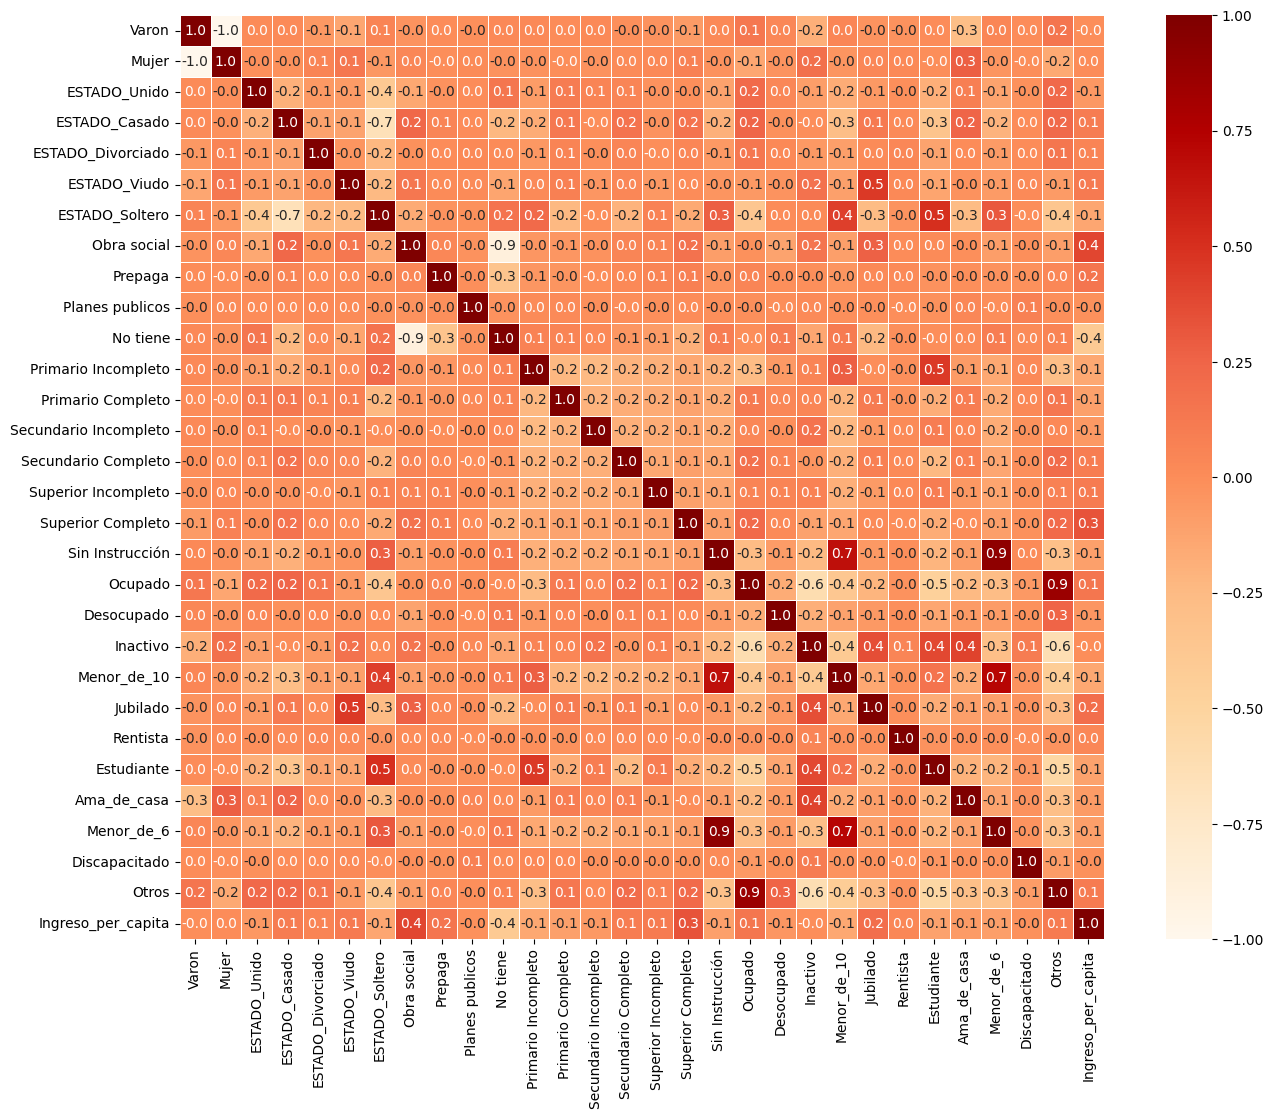

In [36]:
# Correlograma 2005
corr_2005 = corr[corr['df'] == 2005]
corr_2005 = corr_2005.drop(columns=['df'])  # Eliminamos la columna 'df' para el cálculo de correlación
plt.figure(figsize=(16, 12))
sns.heatmap(corr_2005.corr(), annot=True, fmt=".1f", cmap='OrRd', cbar=True, square=True, linewidths=.5)

<Axes: >

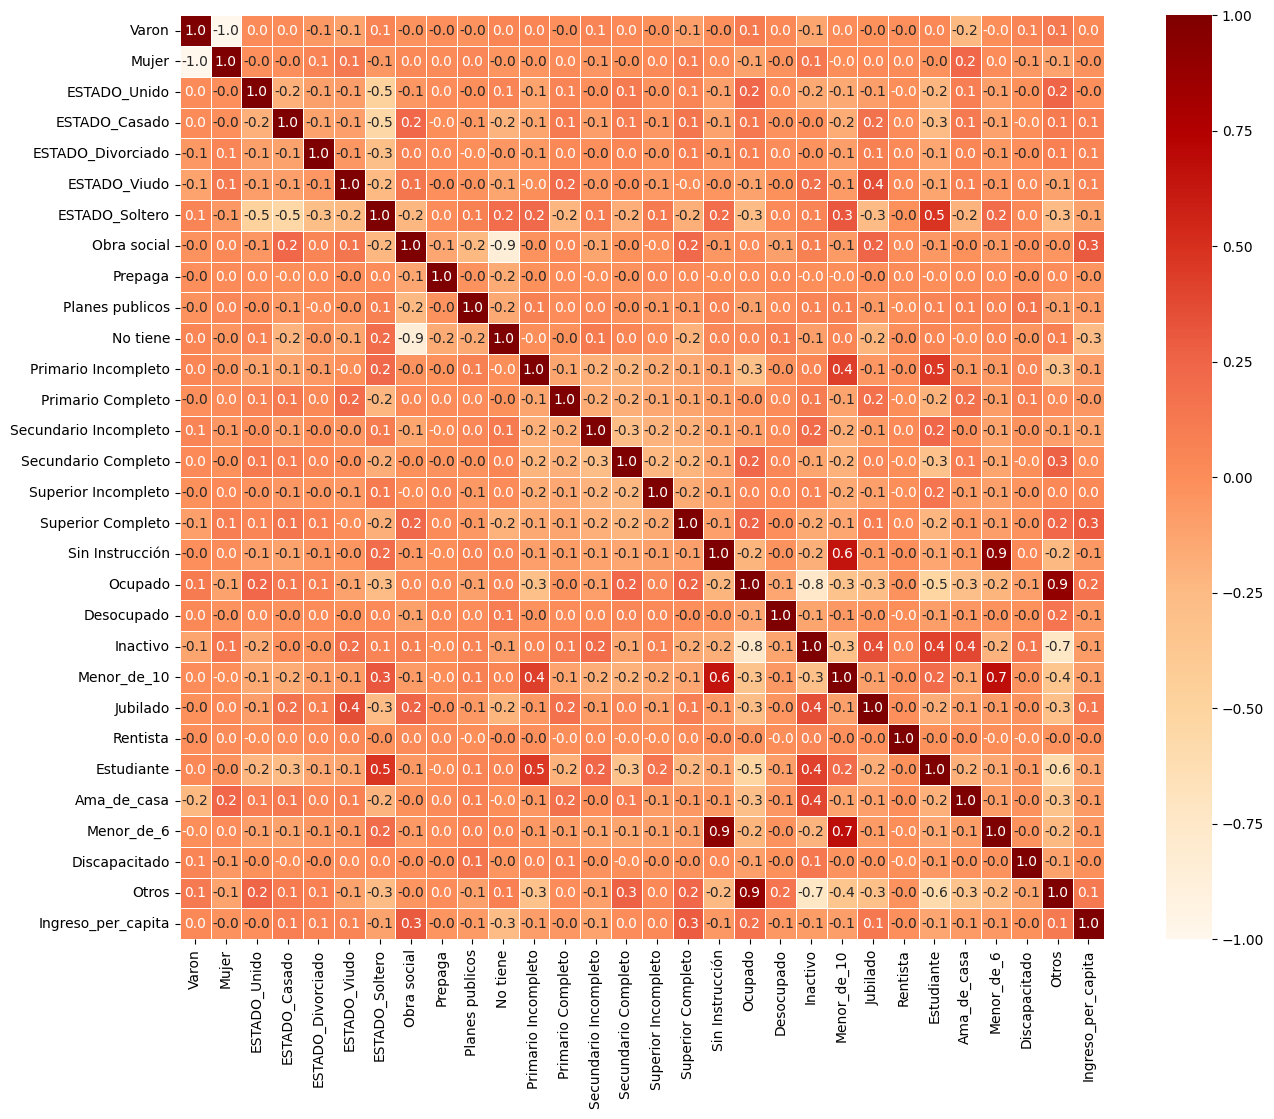

In [37]:
# Correlograma 2025
corr_2025 = corr[corr['df'] == 2025]
corr_2025 = corr_2025.drop(columns=['df'])  # Eliminamos la columna 'df' para el cálculo de correlación
plt.figure(figsize=(16, 12))
sns.heatmap(corr_2025.corr(), annot=True, fmt=".1f", cmap='OrRd', cbar=True, square=True, linewidths=.5)

#### Parte 3 - 5 y 6: No respuesta en ITF y adulto equivalente

Primero crearemos la columna de adulto equivalente y luego realizaremos la partición en base a respuesta de ITF

In [40]:
# Cargamos la tabla adulto
# adulto_esquiv = pd.read_excel("C:\\Users\\user\\Documents\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\tabla_adulto_equiv.xlsx")
adulto_esquiv = pd.read_excel("C:\\Users\\Usuario\\Documents\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\tabla_adulto_equiv.xlsx")

adulto_esquiv.sample(5)


,Edad,Mujeres,Varones
9,9 años,0.69,0.69
13,13 años,0.76,0.90
3,3 años,0.51,0.51
21,61 a 75 años,0.67,0.83
22,más de 75 años,0.63,0.74


In [41]:
# Creamos una función para categorizar las edades
def map_age_to_range(age):
    if age < 1:
        return 'Menor de 1 año'
    elif age == 1:
        return '1 año'
    elif age == 2:
        return '2 años'
    elif age == 3:
        return '3 años'
    elif age == 4:
        return '4 años'
    elif age == 5:
        return '5 años'
    elif age == 6:
        return '6 años'
    elif age == 7:
        return '7 años'
    elif age == 8:
        return '8 años'
    elif age == 9:
        return '9 años'
    elif age == 10:
        return '10 años'
    elif age == 11:
        return '11 años'
    elif age == 12:
        return '12 años'
    elif age == 13:
        return '13 años'
    elif age == 14:
        return '14 años'
    elif age == 15:
        return '15 años'
    elif age == 16:
        return '16 años'
    elif age == 17:
        return '17 años'
    elif 18 <= age <= 29:
        return '18 a 29 años'
    elif 30 <= age <= 45:
        return '30 a 45 años'
    elif 46 <= age <= 60:
        return '46 a 60 años'
    elif 61 <= age <= 75:
        return '61 a 75 años'
    else:
        return 'más de 75 años'

# Agregamos la colummna rango de edad en la base eph
eph_105_125['rango_edad'] = eph_105_125['ch06'].apply(map_age_to_range)

# Renombramos para hacer el merge
adulto_esquiv_renamed = adulto_esquiv.rename(columns={'Edad': 'rango_edad'})

# Unimos las bases
eph_merged = eph_105_125.merge(adulto_esquiv_renamed, on='rango_edad', how='left')

# Creamos columna adulto_esquiv en base a sexo
eph_merged['adulto_esquiv'] = eph_merged.apply(
    lambda row: row['Varones'] if row['ch04'] == 1 else row['Mujeres'] if row['ch04'] == 2 else None,
    axis=1
)

# Eliminamos las variables Mujeres y Varones
eph_merged = eph_merged.drop(columns=['Mujeres', 'Varones'])

# Creamos el concatenado para generar un codigo de hogar
eph_merged['ID_hogar'] = eph_merged['CODUSU'].astype(str) + '-' + eph_merged['nro_hogar'].astype(str)

#Creamos la variable ad_equiv_hogar
eph_merged['ad_equiv_hogar'] = eph_merged.groupby('ID_hogar')['adulto_esquiv'].transform('sum')

# Una vez que hemos creado las variables, creamos las bases del punto 5
respondieron = eph_merged[eph_merged['itf'] > 0]
norespondieron = eph_merged[eph_merged['itf'] == 0]

#### Parte 3 - 7: Ingreso necesario

In [47]:
# Definir los valores de la Canasta Básica Total por adulto equivalente
cbt_valores = {
    'T105': 205.07,   # Primer trimestre de 2005
    'T125': 365177   # Primer trimestre de 2025
}

# Crear la columna 'ingreso_necesario' multiplicando por el valor correspondiente
respondieron.loc[:,'ingreso_necesario'] = respondieron.apply(
    lambda row: row['ad_equiv_hogar'] * cbt_valores.get(row['df'], 0),
    axis=1
)
respondieron.sample(5)

,CODUSU,nro_hogar,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,...,tot_p12,t_vi,itf,df,rango_edad,adulto_esquiv,ID_hogar,ad_equiv_hogar,ingreso_necesario,pobre
10653,TQRMNOQPQHJOKMCDEHIBB00872676,1.0,1,6,5,4.0,1,4.0,3,240000.000000,...,0.0,0.0,1200000.0,T125,6 años,0.64,TQRMNOQPQHJOKMCDEHIBB00872676-1.0,3.64,1.329244e+06,0
4670,178503,2.0,1,10,5,1.0,1,3.0,3,312.500000,...,0.0,0.0,1250.0,T105,10 años,0.79,178503 -2.0,2.56,5.249792e+02,0
390,159799,1.0,2,45,2,1.0,6,1.0,0,1846.666667,...,340.0,0.0,5540.0,T105,30 a 45 años,0.77,159799 -1.0,2.79,5.721453e+02,0
3790,243220,1.0,1,28,5,1.0,4,1.0,0,293.333333,...,0.0,0.0,880.0,T105,18 a 29 años,1.02,243220 -1.0,2.78,5.700946e+02,0
3732,232628,1.0,2,27,5,4.0,5,1.0,0,220.000000,...,0.0,0.0,1100.0,T105,18 a 29 años,0.76,232628 -1.0,3.79,7.772153e+02,0


#### Parte 3 - 8: Columna pobre

In [49]:
# Creamos la variable "pobre"
# Donde 1 es igual a pobre y 0 no pobre
respondieron.loc[:,'pobre'] = (respondieron['itf'] < respondieron['ingreso_necesario']).astype(int)

# Creamos la tabla
tabla_pobreza = (
    respondieron
    .groupby('df', as_index=False)
    .agg(
        pobres=('pobre', lambda x: (x == 1).sum()),
        total=('pobre', 'count')
    )
)
tabla_pobreza['porcentaje'] = (tabla_pobreza['pobres'] / tabla_pobreza['total'] * 100).round(2)
tabla_pobreza

,df,pobres,total,porcentaje
0,T105,4072,9278,43.89
1,T125,3888,8695,44.72


#### Parte 3 - 9: Analisis exploratorio de pobre

In [ ]:
# Estadísticas descriptivas relevantes de "pobre" por año
desc_pobre = (
    respondieron
    .groupby('df')
    .agg(
        media_pobre=('pobre', 'mean'),
        mediana_pobre=('pobre', 'median'),
        std_pobre=('pobre', 'std'),
        cantidad=('pobre', 'count'),

    )
    .reset_index()
)
desc_pobre['media_pobre'] = (desc_pobre['media_pobre'] * 100).round(2)
desc_pobre

,df,media_pobre,mediana_pobre,std_pobre,cantidad
0,T105,43.89,0.0,0.496278,9278
1,T125,44.72,0.0,0.497228,8695


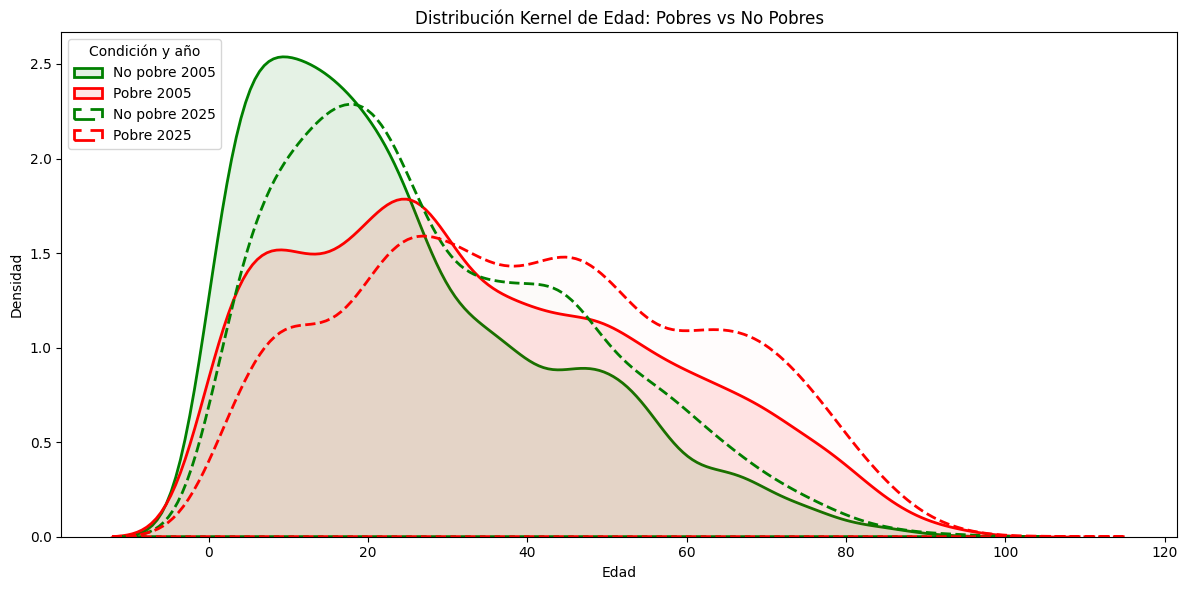

In [106]:
# Gráfico: Distribución kernel de la edad para pobres y no pobres superpuestos
fig, ax = plt.subplots(figsize=(12, 6))
# Distribución kernel de la edad para pobres y no pobres, separados por año
sns.kdeplot(
    data=respondieron[respondieron['df'] == 'T105'],
    x='ch06',
    hue='pobre',
    multiple='layer',
    common_norm=False,
    palette= ['red', 'green'],
    fill=True,
    alpha=0.1,
    linewidth=2,
    label='2005',
    ax=ax
)
sns.kdeplot(
    data=respondieron[respondieron['df'] == 'T125'],
    x='ch06',
    hue='pobre',
    multiple='layer',
    common_norm=False,
    palette=['red', 'green'],
    fill=True,
    alpha=0.01,
    linewidth=2,
    label='2025',
    linestyle='--',
    ax=ax
)

# Actualizamos la leyenda manualmente para mostrar todas las combinaciones
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = ['No pobre 2005', 'Pobre 2005', 'No pobre 2025', 'Pobre 2025']
plt.legend(handles, custom_labels, title='Condición y año', loc='upper right')
plt.gca().legend(handles=plt.gca().get_legend_handles_labels()[0], labels=custom_labels, title='Condición y año', loc='upper left')

plt.yticks(np.arange(0, 0.026, 0.005), labels=[f'{x*100:.1f}' for x in np.arange(0, 0.026, 0.005)])
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.title('Distribución Kernel de Edad: Pobres vs No Pobres')
plt.tight_layout()
plt.show()

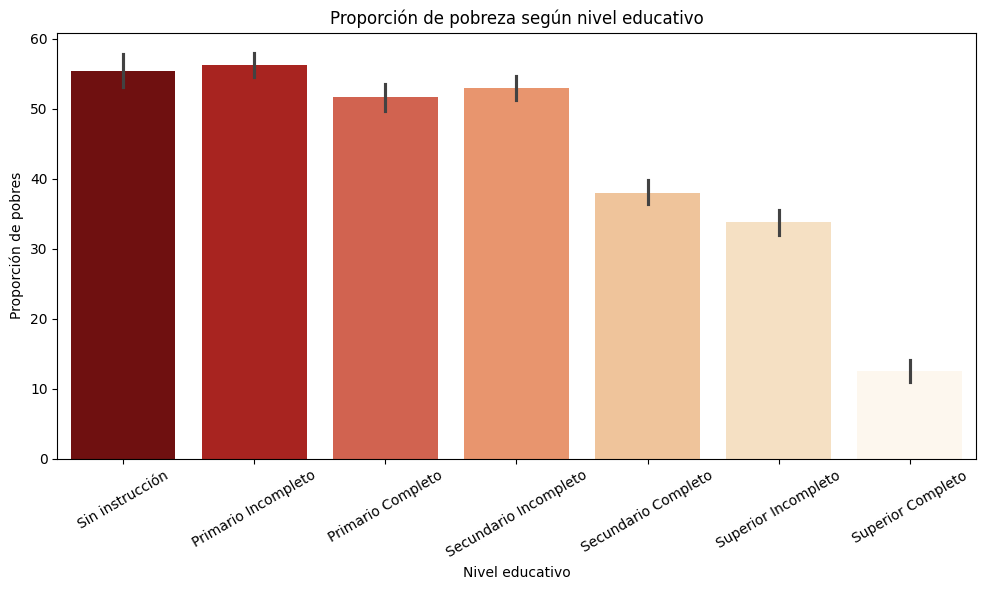

In [121]:
barras = respondieron.copy()
barras.loc[:,"nivel_ed"] = barras["nivel_ed"].replace(7,0)


# Gráfico de barras: proporción de pobres por nivel educativo
plt.figure(figsize=(10, 6))


sns.barplot(
    data=barras,
    x='nivel_ed',
    hue = 'nivel_ed',
    legend = False,
    y='pobre',
    estimator=np.mean,
    palette='OrRd_r'
)

plt.xlabel('Nivel educativo')
plt.ylabel('Proporción de pobres')
plt.title('Proporción de pobreza según nivel educativo')
plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5, 6],
    labels=[
        'Sin instrucción', 'Primario Incompleto', 'Primario Completo',
        'Secundario Incompleto', 'Secundario Completo',
        'Superior Incompleto', 'Superior Completo'
    ],
    rotation=30
)
plt.yticks(np.arange(0, 0.61, 0.1), labels=[f'{x*100:.0f}' for x in np.arange(0, 0.61, 0.1)])


plt.tight_layout()
plt.show()